<img src="https://cdn.sstatic.net/Sites/stackoverflow/company/img/logos/so/so-logo.png" style="width:400px;height:80px;" align="middle">
<h1><font color="orange">Stackoverflow Survey 2017 Data Analysis</font></h1>

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
%matplotlib inline # displays the graphs


In [34]:
data = pd.read_csv('C:/Users/Thomas/Desktop/StackOverFlow/survey_results_public.csv')

<h2><font color="orange">Just displaying some sample data</font></h2>

In [35]:
data.head(10)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN


<h2><font color="orange">Display the top 10 countries with the greatest amount of software developers</font></h2>

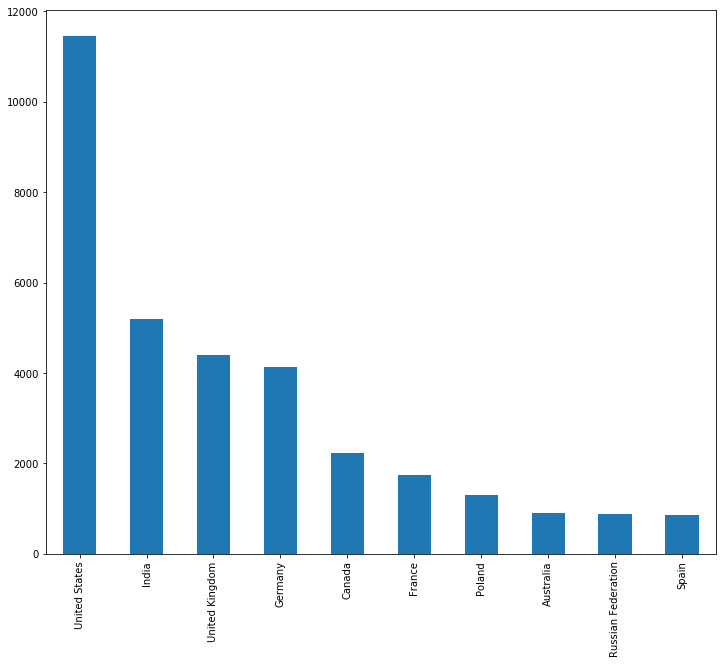

In [36]:
data['Country'].value_counts()[0:10].plot(kind='bar',figsize=(12,10))

<h2><font color="orange">The importance of education</font></h2>

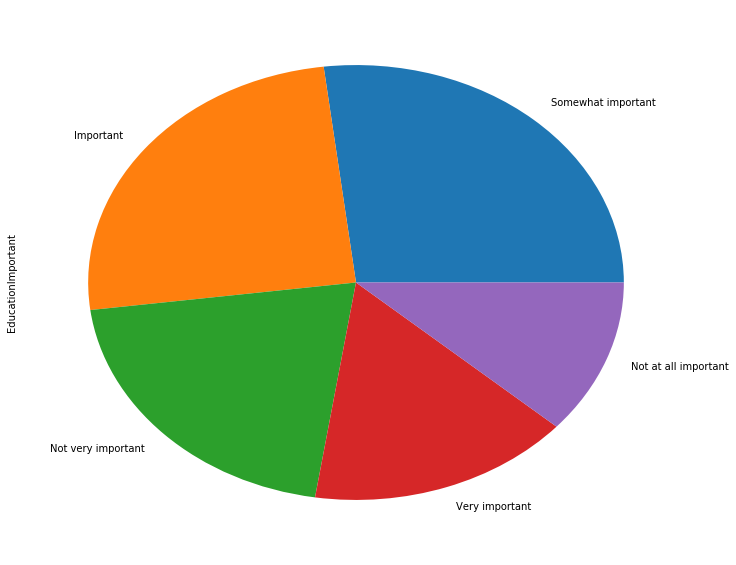

In [37]:
data['EducationImportant'].value_counts().plot(kind='pie',figsize=(12,10))

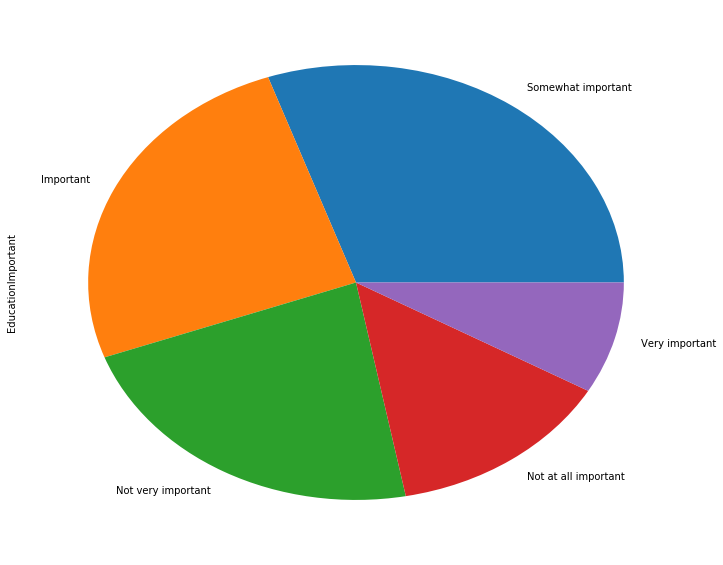

In [38]:
data[data['Country'] == 'Romania']['EducationImportant'].value_counts().plot(kind='pie',figsize=(12,10))

In [39]:
(
    data
    .groupby('EducationImportant')['JobSatisfaction']
    .mean()
    .sort_values(ascending=False)
)

EducationImportant
Very important          7.213850
Important               7.057989
Not at all important    7.003062
Not very important      6.971906
Somewhat important      6.932311
Name: JobSatisfaction, dtype: float64

In [40]:
romania = data[(data['Country'] == 'Romania') & (data['EducationImportant'] != None)]

In [41]:
(
    romania
    .groupby('EducationImportant')['JobSatisfaction']
    .mean()
    .sort_values(ascending=False)
)

EducationImportant
Important               7.696970
Very important          7.523810
Somewhat important      7.400000
Not at all important    7.210526
Not very important      7.096774
Name: JobSatisfaction, dtype: float64

In [42]:
romania['JobSatisfaction'].mean()

7.346578366445916

In [43]:
(
    romania
    .groupby('EducationImportant')['JobSatisfaction']
    .count()
    .sort_values(ascending=False)
)

EducationImportant
Somewhat important      80
Important               66
Not very important      62
Not at all important    38
Very important          21
Name: JobSatisfaction, dtype: int64